# Project 2 - Ames Housing Data and Kaggle Challenge

## 02 Model selection and analyze

### Imports

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas.api.types import CategoricalDtype 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder

In [270]:
# import clean data

train = pd.read_csv('../datasets/train_clean2.csv')
test = pd.read_csv('../datasets/test_clean2.csv')

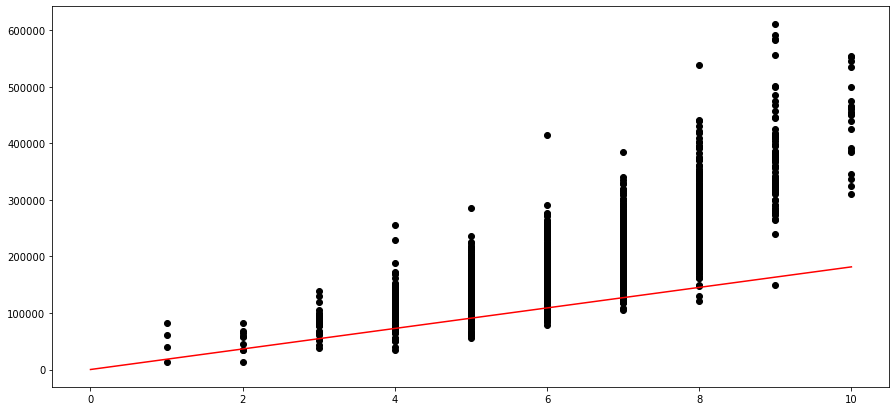

In [271]:
#ploting a baseline model for the top two with highest correlation to saleprice (over all quality)
plt.figure(figsize=(15,7))
plt.scatter(train['overallqual'], train['saleprice'], color='black')
plt.plot((0, 10),(np.mean(train['overallqual']), np.mean(train['saleprice'])),color='red');

In [200]:
# Correlation of numeric data to SalePrice
train.corr()['saleprice'].abs().sort_values(ascending = False).to_frame()

,saleprice
saleprice,1.000000
overallqual,0.803462
grlivarea,0.719463
exterqual,0.715048
kitchenqual,0.694295
totalbsmtsf,0.665116
garagearea,0.655097
1stflrsf,0.648252
garagecars,0.648227
bsmtqual,0.613236


In [236]:
def model_train_sc_fit(features):
    
    X = train[features]
    X_test = test[features]
    y = train['saleprice']
    
    ss = StandardScaler()
    ss.fit(X)
    X_sc = ss.transform(X)
    X_test_sc = ss.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_sc,y)
    
    ridgeCV = RidgeCV()
    ridgeCV.fit(X_sc,y)
    ridge = Ridge(alpha = ridgeCV.alpha_)
    ridge.fit(X_sc,y)
    
    lassoCV = LassoCV()
    lassoCV.fit(X_sc,y)
    lasso = Lasso(alpha=lassoCV.alpha_)
    lasso.fit(X_sc,y)
    
    elCV = ElasticNetCV(l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    elCV.fit(X_sc,y)
    el = ElasticNet(alpha = elCV.alpha_, l1_ratio = elCV.l1_ratio_)
    el.fit(X_sc,y)

    print('Linear')
    lr_r2_score = lr.score(X_sc,y)
    print("R2 Score:",lr_r2_score)
    lr_cv_r2_xsc = cross_val_score(lr, X_sc, y, cv=10).mean()
    print("R2 CV Score:",lr_cv_r2_xsc)
    lr_cv_rmse_xsc = cross_val_score(lr,X_sc,y,cv=10,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(lr_cv_rmse_xsc.mean()))

    print('')
    print('Ridge')
    ridge_r2_score = ridge.score(X_sc,y)
    print("R2 Score:", ridge_r2_score)
    ridge_cv_r2_xsc = cross_val_score(ridge, X_sc, y, cv=10).mean()
    print("R2 CV Score:",ridge_cv_r2_xsc)
    ridge_cv_rmse_xsc = cross_val_score(ridge,X_sc,y,cv=10,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(ridge_cv_rmse_xsc.mean()))


    print('')
    print('Lasso')
    lasso_r2_score = lasso.score(X_sc,y)
    print("R2 Score:", lasso_r2_score)
    lasso_cv_r2_xsc = cross_val_score(lasso, X_sc, y, cv=10).mean()
    print("R2 CV Score",lasso_cv_r2_xsc)
    lasso_cv_rmse_xsc = cross_val_score(lasso,X_sc,y,cv=10,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(lasso_cv_rmse_xsc.mean()))
    
    print('')
    print('ElasticNet')
    el_r2_score = el.score(X_sc,y)
    print("R2 Score:", el_r2_score)
    el_cv_r2_xsc = cross_val_score(el, X_sc, y, cv=5).mean()
    print("R2 CV Score",el_cv_r2_xsc)
    el_cv_rmse_xsc = cross_val_score(el,X_sc,y,cv=5,scoring='neg_root_mean_squared_error')
    print("RMSE CV:",np.abs(el_cv_rmse_xsc.mean()))
    
    if lr_cv_r2_xsc > ridge_cv_r2_xsc and lr_cv_r2_xsc > el_cv_r2_xsc and lr_cv_r2_xsc > lasso_cv_r2_xsc:
        print('')
        print('Linear is the best')
        lr.fit(X_sc,y)
        y_pred = lr.predict(X_test_sc)
    elif ridge_cv_r2_xsc > lr_cv_r2_xsc and ridge_cv_r2_xsc > el_cv_r2_xsc and ridge_cv_r2_xsc > lasso_cv_r2_xsc:
        print('')
        print('Ridge is the best')
        ridge.fit(X_sc,y)
        y_pred = ridge.predict(X_test_sc)
    elif lasso_cv_r2_xsc > lr_cv_r2_xsc and lasso_cv_r2_xsc > el_cv_r2_xsc and lasso_cv_r2_xsc > ridge_cv_r2_xsc:
        print('')
        print('Lasso is the best')
        lasso.fit(X_sc,y)
        y_pred = lasso.predict(X_test_sc) 
    else: 
        print('')
        print('ElasticNet is the best')
        el.fit(X_sc,y)
        y_pred = el.predict(X_test_sc)
        
    return y_pred

## Model selection

## Model 1

This model select features with corr more than 40%  
Its seem like to be overfitted  
since RSME in train data is 27601.96814991456  
but RSME in test data is 33274.66597  

In [237]:
#select feature with corr more than 40%
features = ['overallqual','exterqual','grlivarea','kitchenqual','garagearea','garagecars','totalbsmtsf',
            '1stflrsf','bsmtqual','yearbuilt','garagefinish','yearremod/add','fireplacequ','fullbath',
            'foundation_PConc','totrmsabvgrd','masvnrarea','fireplaces','heatingqc','neighborhood_NridgHt',
            'bsmtexposure','masvnrtype_None','bsmtfinsf1']

In [238]:
y_pred = model_train_sc_fit(features)

Linear
R2 Score: 0.8807476994336438
R2 CV Score: 0.877423050592934
RMSE CV: 27617.644784369164

Ridge
R2 Score: 0.8807352849283038
R2 CV Score: 0.8774722567870719
RMSE CV: 27613.16900568629

Lasso
R2 Score: 0.8806000363143628
R2 CV Score 0.8775843345942558
RMSE CV: 27601.96814991456

ElasticNet
R2 Score: 0.8806000363143628
R2 CV Score 0.876805915841396
RMSE CV: 27730.892039660732

Lasso is the best


#### Lasso have highest R2

In [239]:
# export file for submission
pd.DataFrame(data = {'Id': test['id'],'SalePrice': best}).to_csv('../datasets/model1_lasso_.csv',index=False)

## Model 2

This model select all features  
Has high RMSE score in here but  
Its seem like to be overfitted  
since RSME in train data is 23376.928507913595  
but RSME in test data is 27455.62105

In [240]:
#select all features
features2 = [f for f in train._get_numeric_data().columns if f !='saleprice' and f !='id' and f !='pid']

In [241]:
y_pred2 = model_train_sc_fit(features2)

Linear
R2 Score: 0.9305132374141754
R2 CV Score: -2.480768275322853e+25
RMSE CV: 2.111422513313744e+17

Ridge
R2 Score: 0.9304259558045925
R2 CV Score: 0.9088115887334549
RMSE CV: 23814.78051640214

Lasso
R2 Score: 0.9267450458468508
R2 CV Score 0.9122546024460505
RMSE CV: 23376.928507913595

ElasticNet
R2 Score: 0.9267450458468508
R2 CV Score 0.9102867425630551
RMSE CV: 23685.579169511013

Lasso is the best


#### Lasso have highest R2

In [242]:
# export file for submission
pd.DataFrame(data = {'Id': test['id'],'SalePrice': y_pred2}).to_csv('../datasets/model2_lasso_.csv',index=False)

Its seem like to be overfitted  
Increased alpha in lasso to reduce variance

In [245]:
X = train[features2]
X_test = test[features2]
y = train['saleprice']
    
ss = StandardScaler()
ss.fit(X)
X_sc = ss.transform(X)
X_test_sc = ss.transform(X_test)

lasso = Lasso(alpha=1000)
lasso.fit(X_sc,y)
print('')
print('Lasso')
lasso_r2_score = lasso.score(X_sc,y)
print("R2 Score:", lasso_r2_score)
lasso_cv_r2_xsc = cross_val_score(lasso, X_sc, y, cv=10).mean()
print("R2 CV Score",lasso_cv_r2_xsc)
lasso_cv_rmse_xsc = cross_val_score(lasso,X_sc,y,cv=10,scoring='neg_root_mean_squared_error')
print("RMSE CV:",np.abs(lasso_cv_rmse_xsc.mean()))

y_pred = lasso.predict(X_test_sc) 


Lasso
R2 Score: 0.9169817365126826
R2 CV Score 0.9072714945795424
RMSE CV: 24042.606149476087


In [246]:
# export file for submission
pd.DataFrame(data = {'Id': test['id'],'SalePrice': y_pred}).to_csv('../datasets/model2_lasso_alin.csv',index=False)

## Model 3

Its seem like clean data create high variance
so we import the data with outliers

This model select features all features from data with outliers  
 
Its seem like to be best model afterall  
since RSME in train data is 28782.310900738015  
and RSME in test data is 27989.16418

In [280]:
# import data with outliers

train = pd.read_csv('../datasets/train_clean.csv')
test = pd.read_csv('../datasets/test_clean.csv')

In [281]:
features3 = [f for f in train._get_numeric_data().columns if f !='saleprice' and f !='id' and f !='pid']

In [282]:
y_pred3 = model_train_sc_fit(features3)

Linear
R2 Score: 0.9305163810614165
R2 CV Score: -1.65412266517531e+25
RMSE CV: 1.6405035981435773e+17

Ridge
R2 Score: 0.9304212851283278
R2 CV Score: 0.845689822482249
RMSE CV: 29082.548448323436

Lasso
R2 Score: 0.9236768672857277
R2 CV Score 0.8545044995153956
RMSE CV: 28398.89760173507

ElasticNet
R2 Score: 0.9236768672857277
R2 CV Score 0.8635643383704084
RMSE CV: 28782.310900738015

ElasticNet is the best


#### Elasticnet have highest R2

In [283]:
# export file for submission
pd.DataFrame(data = {'Id': test['id'],'SalePrice': y_pred3}).to_csv('../datasets/model3_el_.csv',index=False)

### Analysis of Model 3

In [297]:
X = train[features3]
X_test = test[features3]
y = train['saleprice']
    
ss = StandardScaler()
ss.fit(X)
X_sc = ss.transform(X)
X_test_sc = ss.transform(X_test)

elCV = ElasticNetCV(l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
elCV.fit(X_sc,y)
el = ElasticNet(alpha = elCV.alpha_, l1_ratio = elCV.l1_ratio_)
el.fit(X_sc,y)

y_train_pred = el.predict(X_sc) 
y_pred = el.predict(X_test_sc) 


### Analysis of final model and conclusion

In Model 3, elastic net regression model was selected as its had best prediction value on house price in AMES out perform other linear regression models.  

RMSE is lowest on both train data and test data in Kaggle the score was closed with  
RSME in train data is 28782.310900738015    
RSME in test data on kaggle is 27989.16418  

with R2 cossvalidation score at 86.3%

This showing that thai model can predict the house price +- around $28000

As of elastic net was able to reveal which features affect sale price the most.

##### In conclusion the factors the reslut to house price that owner should consider:  
    - Above ground living area  
    - House in the area of Northridge Heights, Stone Brook is likely to have a good price.   
    - Age of the house  
    - Larger size of the basement  
    - Larger masonry veneer area
    - New house is likelu to have better sale price.  
    - Basement with good exposure  
    - Larger size of the basement    
    - Overall quality of the house  
    - Overall condition of the house
    
##### Value added to the house:  

    - Renovate basement finished area (if exist)  
    - Elevator (if possible)  
    - Renovate external area of the house    
    - Renovate kitchen  
    
##### Value deducted to the house:  
    - Clay or Tile roof materials
    


model3 has 106 non-zero coefficients.


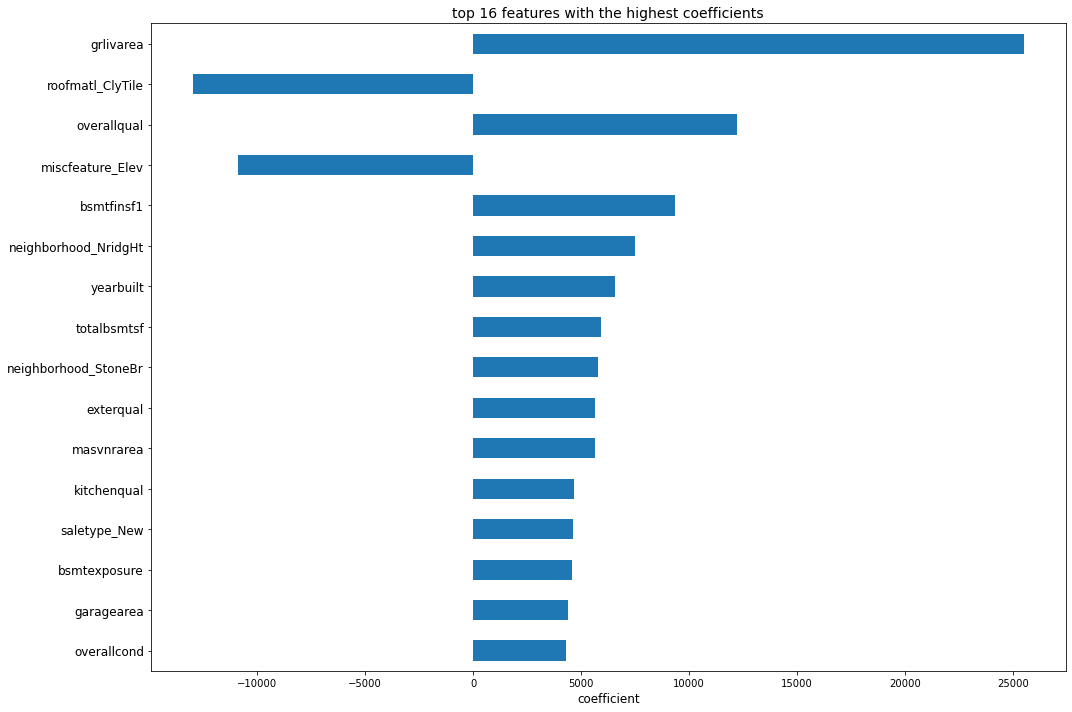

In [316]:
# ---------- TOP features used in model3 --------- #

# get list of coefficients that are not 0
# column labels
coef_labels = [col for col in train.columns if col != 'saleprice' and col != 'id' and col != 'pid'] 
# get coefficients from best model
el_coef = pd.DataFrame(el.coef_, index = coef_labels)
# get non-zero coefficients
el_coef = el_coef[el_coef[0] != 0]                                   
print(f'model3 has {el_coef.shape[0]} non-zero coefficients.')

# sort by absolute values
el_coef = el_coef.reindex(el_coef[0].abs().sort_values(ascending=True).index)

# plot top 16 coefficients
el_coef.tail(16).plot.barh(figsize=(15,10), legend = None)
plt.title('top 16 features with the highest coefficients',fontsize=14)
plt.xlabel('coefficient', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

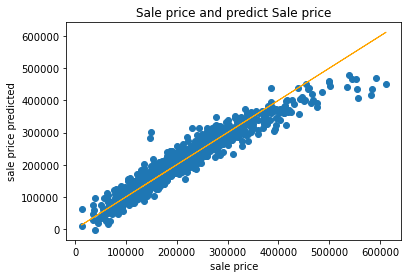

In [311]:
plt.scatter(y, y_train_pred)
plt.plot(y, y, color='orange', linewidth=1)
plt.title('Sale price and predict Sale price')
plt.xlabel('sale price')
plt.ylabel('sale price predicted')
plt.show()

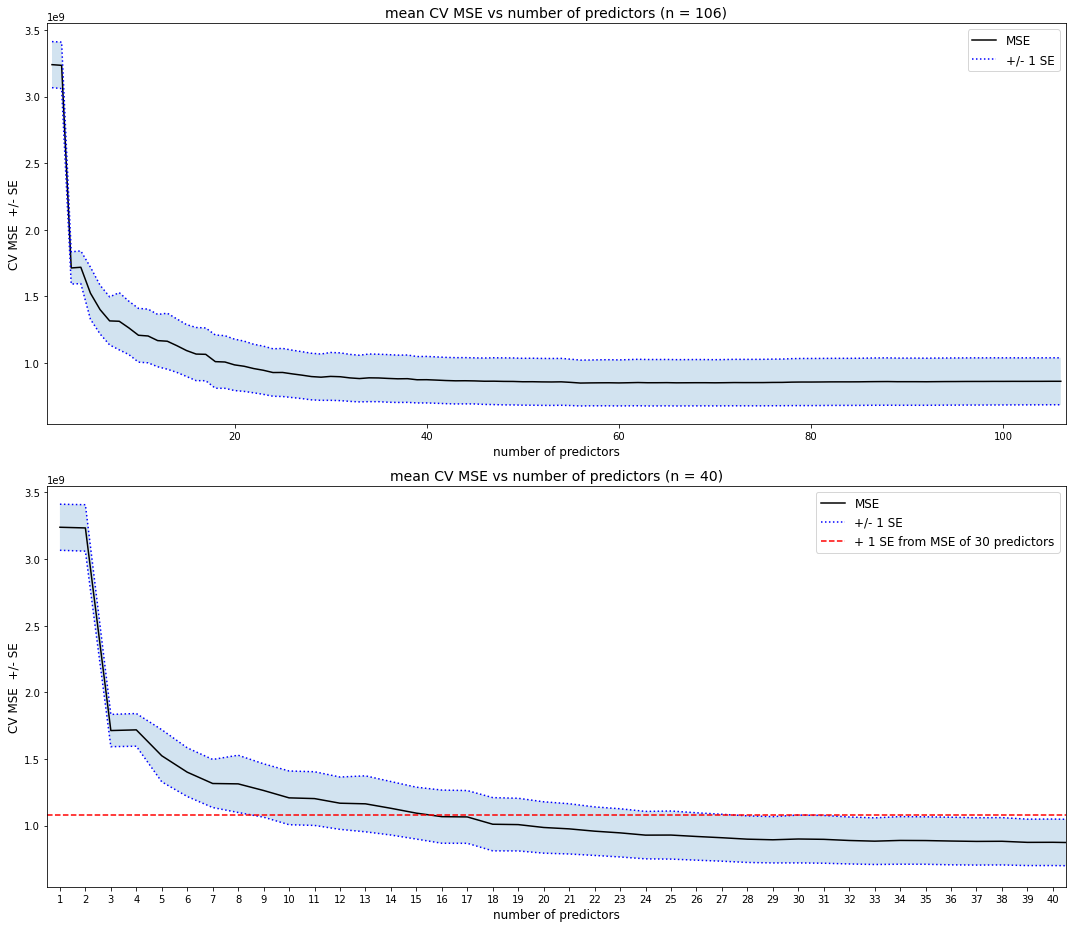

In [318]:

# ------------------ EVALUATING MODEL PERFORMANCE (USING CV) BASED ON NO. OF FEATURES --------------------#

# put the test data into a dataframe so they can be sliced
xtrain_df = pd.DataFrame(X_sc, columns = coef_labels)
    
# for each number of predictors in the 106 non-zero predictors, compute validation set error (MSE) and SE
# starting from the predictor with the highest coefficient
n_predictors = 106
mse_mean = []
mse_se = []
for n in range(1,n_predictors+1):
    predictors = el_coef.index[-n:]  # coefficients are sorted by absolute values, highest at bottom
    xtrain_sliced = xtrain_df[predictors]   # slice out just that predictor from xtest_scaled
    # get validation set MSE and MSE variance
    cv_scores = -cross_val_score(el, xtrain_sliced, y, scoring = 'neg_mean_squared_error', cv = 5)
    mse_mean.append(cv_scores.mean())
    mse_se.append(cv_scores.std()/np.sqrt(5))

# ------------------------- PLOT VALIDATION SET ERROR AGAINST NO. PREDICTORS -----------------------------#
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize=(15,13))

# PLOT WITH ALL PREDICTORS

ax[0].plot(np.arange(1,n_predictors+1,1), mse_mean, 'k', label = 'MSE')
# plot error lines showing +/- SE of the MSE
ax[0].plot(np.arange(1,n_predictors+1,1),[a+b for a, b in zip(mse_mean,mse_se)], 'b:',
        label='+/- 1 SE')
ax[0].plot(np.arange(1,n_predictors+1,1),[a-b for a, b, in zip(mse_mean,mse_se)], 'b:')
# set fill color between error lines
ax[0].fill_between(np.arange(1,n_predictors+1,1), [a+b for a, b in zip(mse_mean,mse_se)],
                                   [a-b for a, b in zip(mse_mean,mse_se)], alpha=0.2)
ax[0].set_title('mean CV MSE vs number of predictors (n = 106)', fontsize=14)
ax[0].set_ylabel('CV MSE  +/- SE', fontsize = 12)
ax[0].set_xlabel('number of predictors', fontsize = 12)
ax[0].set_xlim(0.5, n_predictors + 0.5)
ax[0].legend(loc = 'upper right',  prop={'size': 12})

# ZOOMED-IN PLOT WITH 40 PREDICTORS

ax[1].plot(np.arange(1,n_predictors+1,1), mse_mean, 'k', label = 'MSE')
# plot error lines showing +/- SE of the MSE
ax[1].plot(np.arange(1,n_predictors+1,1),[a+b for a, b in zip(mse_mean,mse_se)], 'b:',
        label='+/- 1 SE')
ax[1].plot(np.arange(1,n_predictors+1,1),[a-b for a, b, in zip(mse_mean,mse_se)], 'b:')
# set fill color between error lines
ax[1].fill_between(np.arange(1,n_predictors+1,1), [a+b for a, b in zip(mse_mean,mse_se)],\
                                   [a-b for a, b in zip(mse_mean,mse_se)], alpha=0.2)
# there does not seem to be significant declines in MSE beyond 30 predictors
# plot horizontal line for the MSE of 30 predictors, + 1 SE
ax[1].axhline(mse_se[29]+mse_mean[29], linestyle='--', color='r',label = '+ 1 SE from MSE of 30 predictors')
ax[1].set_title('mean CV MSE vs number of predictors (n = 40)', fontsize=14)
ax[1].set_ylabel('CV MSE  +/- SE', fontsize = 12)
ax[1].set_xlabel('number of predictors', fontsize = 12)
ax[1].set_xticks(np.arange(1,41,1))
ax[1].set_xlim(0.5, 40 + 0.5)
ax[1].legend(loc = 'upper right',  prop={'size': 12})

plt.tight_layout()